# 웹 데이터 수집

* Last Updated: 20170325 20161004

## 1.1 학습내용

### 1.1.1 목표

* 웹 페이지를 크롤링해서 가져올 수 있다.
* 웹 페이지에서 원하는 데이터를 추출할 수 있다.

### 1.1.2 목차

* 1.2 인터넷으로 나가기
* 1.2.1 인터넷에 많은 정보가 있다. 
* 1.2.2 웹클라이언트와 서버
* 1.2.3 http
* 1.3 웹 크롤링
* 1.3.1 프로그래밍으로 웹크롤링
* 1.3.2 웹페이지 주소
* 1.3.3 params
* 1.4 url 가져오기
* 1.4.1 library
* 1.4.2 HTTP errors
* 1.5 BeautifulSoup

### 1.1.3 문제

* 웹데이터-1: python.org 페이지를 크롤링해서 http url를 출력하기


## 1.2 인터넷으로 나가기

### 1.2.1  인터넷에 많은 정보가 있다.

인터넷은 어디에나 있다.
뉴스를 잉크 냄새가 가시지 않은 신문에서 읽다가 인터넷으로 바꿔탄지 이미 오래되었다.
영화를 보거나 음악을 듣을 수도 있다.
과거와 달리 댓글을 달기도 있다. 이런 '참여'는 인터넷이 가져온 극적인 변화이다.
과거와 달리 일반 사용자도 콘텐츠를 생산하여 인터넷에 올리고 있다.
블로그, SNS가 그렇다.
인터넷은 이제 우리의 감정, 사고, 활동, 회사의 홍보, 복잡한 연구 등을 가지고 있는 정보 저장소가 되었다.

### 1.2.2 웹클라이언트와 서버

인터넷은 클라이언트와 서버로 구성되어 있다.
우리가 사용하는 웹브라우저가 클라이언트이다.
웹클라이언트는 브라우저보다 생소한 용어이지만 서비스를 요청하고 받는 '고객'이라는 의미로 이해하면 쉽다. 
구글 크롬, 인터넷 익스플로러, 파이어폭스 등이 브라우저이고 '웹페이지'를 요청하고 받은 정보를 표현할 수 있다.
텍스트뿐만 아니라 사진, 동영상, 소리 등 다양한 멀티미디어 정보를 모두 표현, 렌더링하고 있다.

> 웹페이지 html을 순서, 크기, 색 등 스타일에 따라 브라우저에 표현하는 것을 랜더링(rendering)이라고 한다. 렌더링하지 않으면 html은 텍스트일 뿐이다. $\lt$h1$\gt$는 큰 글씨로 랜더링된다.

웹페이지는 웹서버에서 생산되어 클라이언트로 전송된다. 웹서버는 클라이언트에서 요청하는 페이지나 작업을 실행하여 브라우저로 돌려준다. 웹서버는 보통 http 서버를 말한다. 예를 들면, Microsoft's IIS, Apache server가 있다. 웹서버는 보통 원격에 위치하며, http 통신을 하기 위해 설치된 소프트웨어를 말한다.

### 1.2.3 http

http는 HpyerText Transfer Protocol의 줄임말이다.
'하이퍼텍스트 전송약속'이라고 풀어쓸 수 있다. '하이퍼텍스트'는 마우스를 가져가면 링크가 활성화되고 바로가기가 실행되는 형식이다. 종이문서를 한 줄씩 순서대로 읽기와 다른 특징이다. '전송약속'은 앞서 설명한 웹클라이언트와 웹서버 간 데이터교환방식이다. 하이퍼텍스트 전송규칙에 사용되는 기술이다.
* http는 80번 포트를 사용한다. 포트는 창구라고 생각하면 된다. 창구는 전화통화와 같이 바로 요청, 바로 응답하지는 않는다. 80번 창구에 요청하고, 번호표를 받고, 처리가 완료될 때까지 응답을 기다리는 형태이다.
* http는 Request, Response라는 객체를 사용한다.
    * Request는 웹클라이언트가 80번 창구를 통해 웹서버에게 하는 요청이다.
    * Response는 웹서버가 80번 창구를 통해 전달하는 처리결과이다.

In [2]:
import iplantuml

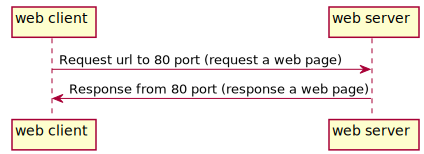

In [13]:
%%plantuml

@startuml
"web client" -> "web server":Request url to 80 port (request a web page)
"web server" -> "web client":Response from 80 port (response a web page)
@enduml

### 1.3 웹 크롤링

웹크롤링은 인터넷에서 정보를 가져와서, 데이터 분석에 필요한 형식으로 변환하는 작업이다.
웹에서 추출하는 출처를 넣어 웹마이닝, 웹스크레이핑이라고도 한다. 인터넷 이전의 마이닝 (mining), 스크레이핑 (scraping), 크롤링 (crawling)과 같은 의미이다.
웹에서 추출된 정보는 '웹데이터'라고 한다. 보통 데이터와 구별하고 있고 그 특징도 있다.
* 웹데이터는 웹 사이트에서 http통신으로 교환되는 데이터를 말한다. 따라서 모두 문자이다. 정량데이터도 예외가 아니다.
따라서 웹에서 읽은 수를 합계, 평균을 계산하려면 문자에서 숫자형식으로 변환하는 것이 필요하다.
* 서버가 반환하는 웹데이터는 보통 html, xml, json 형식을 가진다. 데이터를 사용하려면 추출을 미리 해야 한다.

* 가져오는 방식은 api를 제공하는지에 따라 구분할 수 있다. api를 제공하지 않는 경우로 좁혀서 크롤링이라고 한다.

방식 | 설명
-----|-----
웹크롤링 | api를 제공하지 않는 경우, 프로그램을 작성해서 웹데이터, 대개의 경우 html 페이지를 가져온다.
api | api를 사용하여 가져온다. 데이터를 대상으로 하며 xml, json 형식이 많이 사용된다.

### 1.3.1 프로그래밍으로 웹크롤링

#### 사람이 하는 크롤링

우리가 크롤링을 하는 경우에는 다음 작업을 반복하게 된다.
* 자신의 컴퓨터에서 웹브라우저 (웹클라이언트)를 실행한다.
* 웹브라우저의 주소창에 웹주소를 입력하고,
* 결과가 웹브라우저에 뜨면, 원하는 데이터를 읽거나, 필요한 부분은 복사해서 저장한다.
* 더 필요한 정보가 있으면 이런 절차를 반복한다.


#### 프로그램으로 하는 크롤링

웹페이지에서 필요한 정보를 추출하는 크롤링을 프로그램으로 만들어 보자.
프로그램은 컴퓨터가 실행하니까 대량 데이터를 반복으로 실행하는 노력을 덜어줄 것이다. 실제 크롤링을 컴퓨터가 아니라 사람이 한다면 효율이 매우 떨어지게 된다.

단계 | 설명
-------|-------
url | 데이터를 가져올 도메인을 정한다. params까지 정해서 주소창에 연습해 본다.
웹서버에 요청 | url의 요청방식 GET, header를 정의한다. http를 통해 서버에 요청(Request)하여 웹페이지를 반환(Response) 받게 된다.
웹서버 처리결과 받기 | Response는 version, response code, body 등을 가진다.
데이터항목 추출 | Response에서 가져온 결과를 tree로 만들어 추출한다 (parser). 대개 html, xml, json형식을 가진다.
저장 | csv, Sql, NoSql을 사용한다.
반복하기 | 다음 페이지를 연속해서 가져올 경우, 다음 requests는 어떻게 정의할지 정의한다.

위 절차는 데이터 수집을 위해 수행된다. 뒤 따르는 데이터 분석을 위해서는 추가 작업이 필요하다. 데이터를 분석가능한 형식으로 정리해야 한다. 보통 행과 열로 정리한다. 그 후 비로서 통계 또는 머신러닝을 사용하여 분석이 시작된다. 여기서는 데이터수집을 데이터분석은 다음에 배워나갈 것이다.


## 1.3.2 웹페이지 주소

#### URL
 
URL은 웹페이지 주소이다. URL은 자원을 찾을 수 있는 방법을 포함하고 있고 URI 주소 방식에 따라 정해진다.

> URI는 Uniform Resource Identifier의 줄임말이고, 어떤 자원에 대한 명칭이다. URI는 URN, URL을 모두 포함한다.
> * '사람'의 예를 들어 보면, '이름'은 URN (Uniform Resource Name)이다.
그 사람이 거주하는 '주소'는 찾아가는 방법을 포함하고 있으므로 URL (Uniform Resource Locator)이다.
> * 파이썬 주소 http://www.python.org/index.html는 URL이다. 맨 앞에 찾아가는 방법, 즉 http를 가지고 있기 때문이다. http를 제외한 www.python.org/index.html은 URN이다.


#### URL의 형식

인터넷주소 url의 형식은 다음과 같이 구성한다.

```
scheme:[//[user:password@]host[:port]][/]path[?query][#fragment]
```

구분 | 설명
-----|-----
scheme | 찾아가는 방법을 의미한다. 인터넷 주소는 http 방식을 사용한다. 예: http://www.smu.ac.kr
사용자인증 | 인터넷주소는 개방되어 있기 때문에 보통 안 적는다.
도메인 네임 | 영어로 된 도메인네임(www.smu.ac.kr)은 사람이, 컴퓨터는 숫자로 된 ip 주소. DNS에서 도메인네임을 ip주소로 변환한다.
param | 도메인에 전송되는 명령어 역할을 하는 params에서 설명

#### 자신의 컴퓨터에 있는 파일의 URI

자신의 컴퓨터에 있는 파일을 읽어오는 URI를 작성한다. 물론 웹브라우저가 읽을 수 있는 형식만 가능하다. 맨 앞 scheme이 http에서 file로 변경된다.
```
file://host/path/to/html
```

웹브라우저를 열고, 주소창에 '로컬파일 주소'를 형식에 맞추어 입력한다.
* 'localhost'는 자신의 컴퓨터 명칭 'hostname'이다. 그 IP주소는 127.0.0.1이다.
* 로컬파일을 부를 경우 'localhost'는 생략할 수 있다.
```
file://localhost/home/jsl/Code/src/mypage1.html
file:///home/jsl/Code/src/mypage1.html (리눅스에서 사용하는 형식)
file:///c:/Code/src/mypage1.html (윈도우에서 사용하는 형식)
```


In [18]:
%%writefile src/mypage1.html
<!DOCTYPE html>
<html>
<head>
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>

Overwriting src/mypage1.html


Python webbrowser를 사용해서 파일을 열 수 있다. Python 웹브라우저webbrowser에서 파일을 여는 경우, **시간**이 좀 걸린다 (몇 초 정도).
운영체제 라이브러리 os를 사용하면 윈도우, 리눅스 교차 실행의 오류를 막을 수 있다. 교차실행오류는 디렉토리 구분자가 윈도우, 리눅스 간에 서로 다르기 때문에 발생한다.
* os.path.join()을 사용하여 디렉토리 구분자로 인한 오류를 막아준다.
* os.path.join()은 현재 작업디렉토리 'os.getcwd()' + 'src' + 'mypage1.html'을 합쳐 준다.

운영체제 | 디렉토리 구분자
-----|-----
윈도우 | ```\```
리눅스 | ```/```

In [1]:
import webbrowser
import os

myuri='file://'+'localhost'+os.path.join(os.getcwd(), 'src','mypage1.html')
#print myuri
webbrowser.open(myuri)

True

* 인터넷에서는 'UTF-8'을 사용한다. https://www.w3.org/International/questions/qa-choosing-encodings
* 한글을 깨지지 않게 하려면, meta charset을 utf-8로 지정한다.

In [2]:
%%writefile src/mypage2.html
<!DOCTYPE html>
<html>
<head>
<meta charset="UTF-8">
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>

Overwriting src/mypage2.html


In [4]:
webbrowser.open(myuri)

True

* ipython notebook에서 html을 표현한다.
    * 셀에 내용을 입력하고 '%%html' 명령어를 사용한다.

In [3]:
%%HTML
<!DOCTYPE html>
<html>
<head>
<meta charset="UTF-8">
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>

#### 원격 URL

원격 구글지도에 접속해 보자. 특정 위치를 지정할 경우 URL에 어떤 변화가 있는지 보자.
* 구글지도에 접속해서, 검색창에 'jongro gu hongji dong' 문자열을 입력한다.
* 그리고 주소창의 domain과 그 뒤에 붙는 검색어를 보면 '/maps/place/'에 주소가 '+'로 연결되어 있다.

이 URL을 Python 프로그램에서 직접 열려면 webbrowser를 사용하면 된다.

In [32]:
#브라우저에서 지도 열기
import webbrowser
myurl='https://www.google.co.kr/maps/place/Hongji-dong,+Jongno-gu,+Seoul/'
webbrowser.open(myurl)

True

### 1.3.3 params

* query string은 다음과 같이 구성한다.
```
http://example.com/over/there?name=ferret
```
* web form을 사용할 경우 query string
    * field와 값을 한 쌍으로 구성, field=value
    * 구분자는 & (또는 세미콜론 ;)
```
field1=value1&field2=value2&field3=value3...
```

* 위 지도를 열 경우와 같이, 검색어를 '+'로 붙여 쓰기도 한다.

In [9]:
import urllib
params = urllib.urlencode({"a":4,"b":20,"c":2016,"d":6,"e":30,"f":2016,"s":"^KS11"})
print params

a=4&c=2016&b=20&e=30&d=6&f=2016&s=%5EKS11


r = requests.get(url, params={'s': thing})


* URL 인코딩
    * URL을 전송할 경우, ASCII 모든 문자를 사용할 수 없다.
    * 이럴 경우 퍼센트 인코딩로 변환해서 전송한다. '%xx', 즉'%'와 그 뒤 16진수로 문자로 부호화 한다.

문자 | URL 인코딩
-----|------
공백 | %20 (또는 '+')
! | %21
" | %22
'# | %23
% | %25
tilde(~) | %7E

* 예를 들어 구글검색 params에 특수문자가 포함될 수 있다.
    * python을 검색하는 경우
```
https://www.google.co.kr/#q=python
https://www.google.co.kr/search?q=python
```

    * 'python tutorial'을 검색할 경우
```
https://www.google.co.kr/#q=python+tutorial
```

    * urllib이 변환기능을 제공하므로, 사용하면 편리하다. (참조, ds_REST.ipynb)

In [1]:
import urllib
params = urllib.urlencode({"#q": "python tutorial"})
print params

%23q=python+tutorial


In [15]:
print urllib.quote('~');
print urllib.quote('~', safe='~');

%7E
~


In [17]:
print urllib.quote(' ')
print urllib.quote_plus(' ')

%20
+


In [11]:
url = 'http://www.google.com/#q='
print url + urllib.quote_plus('python tutorial')

http://www.google.com/#q=python+tutorial


## 1.4 url 가져오기

### 1.4.1 library

* urllib - handles opening and reading URLs
    * Python 3.x에서 urllib를 개정해서 1) urllib.request, 2) urllib.parse, 3) urllib.error로 나눔.
    * 제공하는 기능이 서로 차이가 있어, urllib과 urllib2를 같이 사용하기도 한다.

구분 | 차이
-----|-----
urllib | GET query를 생성하기 위한 urlencode()를 사용할 수 있다.
urllib2 | 'Request'를 사용할 수 있다.

* httplib - handles http requests, urllib내부에서 사용하고 있슴.
* requests - web page가져오거나, API를 사용할 때. 아래는 서로 같은 기능을 한다.
```
urllib2.urlopen(url).read()
requests.get(url).text
```

* urllib2에서 페이지 가져오는 함수 urlopen()
* 사용하고 close() 한다.

In [5]:
import urllib2
response = urllib2.urlopen("https://www.python.org/")
html=response.read()
response.close()

* urllib2 라이브러리는 Request를 사용할 수 있다.
* response의 결과 html을 500자만 읽어서 확인했다.

In [26]:
import urllib2
url = 'http://www.python.org'
request = urllib2.Request(url)
response = urllib2.urlopen(request)
html = response.read()
print html[:500]

<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->

<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jqu


### 1.4.2 HTTP errors

* urllib2.HTTPError 또는 urllib2.URLError
* error.code (참조 https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)

코드 | 구분 | 예
-----|-----|-----
1xx | Informational | 
2xx | Success | 200 OK, 201 Created, 202 Accepted
3xx | Redirection | 
4xx | 클라이언트 오류 | 400 Bad Request, 404 Not Found
5xx | 서버 오류 | 500 Internal Server Error

* 오류의 처리
    * 오류가 발생하였는지 try, except문으로 처리할 수 있다.
    * html에 저장된 내용이 없는 경우 'None'으로 확인할 수 있다.

In [27]:
req = urllib2.Request('http://www.python.org/fish.html')

try:
    response=urllib2.urlopen(req)
except urllib2.HTTPError, e:
    print e.code, e.reason

404 OK


In [28]:
if html is None:
    print("URL is not found")
else:
    print "html has something!"

html has something!


## 1.5 BeautifulSoup

* 많이 사용되는 Python 라이브러리
* html, xml을 파싱할 수 있다.
* 이전 버전은 더 이상 지원되지 않으므로, 버전은 4로 한다.

* Linux Ubuntu는 apt를 사용하여 설치한다.
```
apt install python-bs4 (Python 2을 사용하는 경우)
apt install python3-bs4 (Python 3을 사용하는 경우)
```

* 파이썬 패키지 저장소 PyPi에서 설치하는 경우 pip를 사용한다.
```
pip install beautifulsoup4 (beautifulsoup은 버전3을 설치한다)
```

* 파서를 넣어주지 않으면 기본 파서를 사용한다.

파서 | 설치 | 설정
-----|-----
html.parser | Python에 내장 | BeautifulSoup(markup, "html.parser")
lxml parser | C로 만든 파서, 별도 설치가 필요 | BeautifulSoup(markup, "lxml")

* Linux Ubuntu에서 'lxml' 설치
```
apt-get install python-lxml
```

* 파이썬 패키지 저장소에서 'lxml' 설치

```
pip install lxml
```


* requests로 url의 페이지를 가져와서, 그 페이지를 BeautifulSoup으로 parsing한다.
* class 다음에는 _를 넣어 준다. 또는 key-value 형식으로 맞추어 준다.

In [3]:
from bs4 import BeautifulSoup
import requests
page = requests.get("https://www.python.org/")
soup = BeautifulSoup(page.content,"html.parser")

* soup 객체는 웹페이지를 가지고 있다.

In [6]:
print soup.prettify()[0:1000]

<!DOCTYPE doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" dir="ltr" lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8">
   <meta content="IE=edge" http-equiv="X-UA-Compatible">
    <link href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js" rel="prefetch">
     <meta content="Python.org" name="application-name">
      <meta content="The official home of the Python Programming Language" name="msapplication-tooltip">
       <meta content="Python.org" name="apple-mobile-web-app-title">
        <meta content="yes" name="apple-mobile-web-app-capable">
         <meta content="black" name="apple-mobile-web-app-status-bar-style">
          <meta content="width=device-width, initial-scale=1.0" name="viewport">
           <met

In [5]:
print soup.title
print soup.find_all('div',class_="do-not-print", id="top")

<title>Welcome to Python.org</title>
[<div class="top-bar do-not-print" id="top">\n<nav class="meta-navigation container" role="navigation">\n<div class="skip-link screen-reader-text">\n<a href="#content" title="Skip to content">Skip to content</a>\n</div>\n<a aria-hidden="true" class="jump-link" href="#python-network" id="close-python-network">\n<span aria-hidden="true" class="icon-arrow-down"><span>\u25bc</span></span> Close\n                </a>\n<ul class="menu" role="tree">\n<li class="python-meta current_item selectedcurrent_branch selected">\n<a class="current_item selectedcurrent_branch selected" href="/" title="The Python Programming Language">Python</a>\n</li>\n<li class="psf-meta ">\n<a href="/psf-landing/" title="The Python Software Foundation">PSF</a>\n</li>\n<li class="docs-meta ">\n<a href="https://docs.python.org" title="Python Documentation">Docs</a>\n</li>\n<li class="pypi-meta ">\n<a href="https://pypi.python.org/" title="Python Package Index">PyPI</a>\n</li>\n<li cl

In [12]:
print soup.find_all('div',{'class': 'do-not-print','id':'top'})

[<div class="top-bar do-not-print" id="top">\n<nav class="meta-navigation container" role="navigation">\n<div class="skip-link screen-reader-text">\n<a href="#content" title="Skip to content">Skip to content</a>\n</div>\n<a aria-hidden="true" class="jump-link" href="#python-network" id="close-python-network">\n<span aria-hidden="true" class="icon-arrow-down"><span>\u25bc</span></span> Close\n                </a>\n<ul class="menu" role="tree">\n<li class="python-meta current_item selectedcurrent_branch selected">\n<a class="current_item selectedcurrent_branch selected" href="/" title="The Python Programming Language">Python</a>\n</li>\n<li class="psf-meta ">\n<a href="/psf-landing/" title="The Python Software Foundation">PSF</a>\n</li>\n<li class="docs-meta ">\n<a href="https://docs.python.org" title="Python Documentation">Docs</a>\n</li>\n<li class="pypi-meta ">\n<a href="https://pypi.python.org/" title="Python Package Index">PyPI</a>\n</li>\n<li class="jobs-meta ">\n<a href="/jobs/" t

* a link의 href를 구할 수 있다.

In [11]:
for counter,link in enumerate(soup.find_all('a')):
    if(counter<20):
        print counter,link.get('href')

0 #content
1 #python-network
2 /
3 /psf-landing/
4 https://docs.python.org
5 https://pypi.python.org/
6 /jobs/
7 /community/
8 #top
9 /
10 #site-map
11 #
12 javascript:;
13 javascript:;
14 javascript:;
15 #
16 http://plus.google.com/+Python
17 http://www.facebook.com/pythonlang?fref=ts
18 http://twitter.com/ThePSF
19 /community/irc/


## 웹데이터-1: python.org 페이지가 가지고 있는 http url 출력하기

### 문제

크롤링하려는 'www.python.org'는 파이썬 언어에서 운영하는 홈페이지이므로 자주 방문한게 된다.
여기서 이 페이지가 포함하는 링크를 알아보려고 한다.
문제를 풀기 전에 웹브라우저를 열고 'python.org'라고 입력해 보자.
마우스를 가져가면 하이퍼링크가 활성화된다. 이런 링크를 가져오는 것이 문제이다.
링크는 문서내의 다른 장소로 이동하거나 다른 웹페이지로 이동하는 기능을 제공한다.
다른 페이지로 이동하는 링크만 출력한다.
* 전체 링크의 갯수
* 다른 페이지로 가는 링크 목록

웹브라우저 메뉴에서 소스보기를 클릭하면 html 소스를 볼 수 있다. 하나씩 세어도 답을 할 수 있지만 프로그램으로 하면 시간, 노력, 오류를 줄일 수 있다.

### 풀이


주소창에 url을 입력하고 웹페이지를 요청하는 것과 같이 Python.org페이지를 크롤링해 온다.
* 다음 방식으로 해 본다.
    * BeautifulSoup

In [9]:
import requests

r = requests.get(u'http://python.org/')
r.raise_for_status()
print len(r.content)

48721


In [1]:
import requests

r = requests.get(u'http://python.org/')
uResponse = urllib.urlopen('http://python.org/')
_html = uResponse.read()
print len(_html)

48721


### BeautifulSoup

* 태그를 파싱하는 라이브러리
* 설치를 하지 않았다면:
    * 윈도우 아나콘다창 또는 맥/리눅스 Terminal에서 설치를 한다. 'sudo'는 관리자 권한이다.
    ```
    sudo pip install BeautifulSoup
    ```

* 위 예제, p 태그의 처음에 있는 strong 태그 가져오기
* 파서parser, lxml을 추가한다.

In [2]:
from bs4 import BeautifulSoup
tree=BeautifulSoup(_html, "lxml")
strongtags=tree('strong')
for tag in strongtags:
    print tag

<strong>Notice:</strong>
<strong><small>A</small> A</strong>
<strong>relaunched community-run job board</strong>


* urllib을 사용해서, html을 가져온다.
* 20개만 출력한다. 전체 개수는 맨 마지막 줄에 출력한다.

In [3]:
from urllib import urlopen
from bs4 import BeautifulSoup
#_html = urlopen("http://en.wikipedia.org/wiki/Kevin_Bacon")
_html = urlopen("http://en.wikipedia.org/wiki/HTML").read()
tree = BeautifulSoup(_html, "lxml")
counter=0
for link in tree.findAll("a"):
    if 'href' in link.attrs:
        if counter<20:
            print counter, link.attrs['href']
        counter+=1
print "Total: ", counter

0 /wiki/Wikipedia:Protection_policy#semi
1 #mw-head
2 #p-search
3 /wiki/HTM_(disambiguation)
4 /wiki/Help:HTML_in_wikitext
5 /wiki/File:HTML.svg
6 /wiki/Filename_extension
7 /wiki/Media_type
8 /wiki/Type_code
9 /wiki/World_Wide_Web_Consortium
10 /wiki/WHATWG
11 /wiki/Software_release_life_cycle
12 /wiki/HTML5
13 /wiki/Document_file_format
14 /wiki/Standard_Generalized_Markup_Language
15 /wiki/XHTML
16 /wiki/International_standard
17 http://www.w3.org/TR/html/
18 http://whatwg.org/html
19 http://www.w3.org/TR/html51/
Total:  1610


### 파일 버전

* r.text는 unicode, r.content는 bytes로 Response를 받아온다.
* 페이지를 읽을 경우, 발생오류에 대한 예외처리 try-except를 넣었다.


In [ ]:
# %load src/ds2_1_crawlLink.py
#!

import requests
from bs4 import BeautifulSoup

def readPythonOrg():
    try:
        r = requests.get(u'http://python.org/')
        r.raise_for_status()
    except requests.exceptions.HTTPError as e:
        print e
        sys.exit(1)
    soup=BeautifulSoup(r.content,"lxml")
    my=soup.select("a")
    ahref=soup.find_all('a', href=True)
    print "total number of links:",len(my)


def main():
    readPythonOrg()

if __name__=="__main__":
    main()

